# Laboratorio 01: Regresión Lineal y Redes Neuronales

Objetivo:

1.   Introducción a tensores.
2.   Implementar el algoritmo de regresión lineal utilizando Python.
3.   Implementar el algoritmo de regresión lineal utilizando las librerías Torch.
4. Implementar el algoritmo de regresión lineal utilizando Torch.

## 1. Introducción a tensores

Un tensor PyTorch es básicamente lo mismo que una matriz numpy: no sabe nada sobre aprendizaje profundo o gráficos computacionales o gradientes, y es solo una matriz genérica n-dimensional que se utilizará para el cálculo numérico arbitrario.

### 1.1 Crear un tensor

In [ ]:
import torch
import numpy as np

In [ ]:
# Lista python construir un tensor
list = [[1,2], [3, 4], [5, 6]]
tensor1 = torch.tensor(list)

print(tensor1)
print(tensor1.shape)

# Crear un tensor de una lista
tensor2 = torch.tensor([[1,2], [3, 4], [5, 6]])
print(tensor2)

# Crear un tensor a partir de una matriz numpy
imagen = np.array([1,2,3,4])
tensor3 = torch.tensor(imagen)
print(tensor3)
print(tensor3.shape)

# Torch tensor de números aleatorios
tensor4 = torch.rand(2,3)
print(tensor4)
print(tensor4.shape)

tensor([[1, 2],
        [3, 4],
        [5, 6]])
torch.Size([3, 2])
tensor([[1, 2],
        [3, 4],
        [5, 6]])
tensor([1, 2, 3, 4])
torch.Size([4])
tensor([[0.4986, 0.1534, 0.3330],
        [0.5345, 0.5887, 0.4633]])
torch.Size([2, 3])


### 1.2 Estructura de un tensor

El método *size()* permite ver el tamaño de un tensor, su rango y las dimensiones.

In [ ]:
print(tensor1.size())

torch.Size([3, 2])


### 1.3 Acceso a un tensor

Los elementos de un tensor pueden ser accesados de la misma manera que en **numpy** (librerías de matrices de Python).

In [ ]:
print(tensor1)
print(tensor1[1]) # Obtengo la fila dos de el tensor (completa)
print(tensor1[1,1]) # Obtengo el elemento de la posición de la fila 2 y columna 2

tensor([[1, 2],
        [3, 4],
        [5, 6]])
tensor([3, 4])
tensor(4)


### 1.4 Uso de tensores con CUDA (GPU)

Pytorch permite trabajar con CUDA para realizar operaciones matemáticas en GPU (Si se cuenta con una).

In [ ]:
print(torch.cuda.is_available())
print(torch.cuda.current_device())
print(torch.cuda.get_device_name(0))

True
0
Tesla T4


### 1.5 CPU vs GPU

In [ ]:
%%time
# Tiempo CPU
for i in range(500):
  x = torch.randn(1000, 1000)
  y = torch.randn(1000, 1000)
  z = torch.matmul(x, y)


CPU times: user 23.7 s, sys: 52.3 ms, total: 23.8 s
Wall time: 23.8 s


In [ ]:
%%time
# Tiempo GPU
cuda0 = torch.device('cuda:0')
for i in range(500):
  x = torch.randn(1000, 1000, device=cuda0)
  y = torch.randn(1000, 1000, device=cuda0)
  z = torch.matmul(x, y)


CPU times: user 118 ms, sys: 86.2 ms, total: 204 ms
Wall time: 204 ms


## 2. Regresión lineal (I):

Se realiza el cálculo de la regresión lineal por medio del cálculo manual de los gradientes (derivada de la función de pérdida).

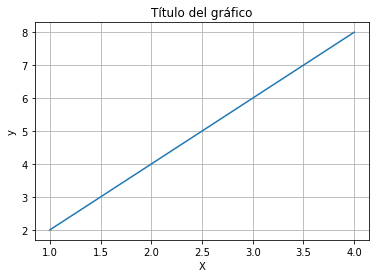

In [ ]:
import matplotlib.pyplot as plt

X = np.array([1, 2, 3, 4], dtype=np.float32)
y = np.array([2, 4, 6, 8], dtype=np.float32)

plt.plot(X, y)
plt.title('Título del gráfico')
plt.xlabel('X')
plt.ylabel('y')
plt.grid(True)

In [ ]:
import numpy as np

X = np.array([1, 2, 3, 4], dtype=np.float32)
y = np.array([2, 4, 6, 8], dtype=np.float32)

# Inicializo con cualquier valor los tetas (W)
W = 0.0

# Hipótesis: Lineal (f(x)=w*x)
def forward(x):
  return W * x

# Loss: MSE
def loss(y, y_pred):
  return ((y - y_pred)**2).mean()

# Gradiente
# L = MSE = 1/N * (w*x - y) ** 2
# dL/dW = 1/N * 2x(w*x -y)
def gradient(x, y, y_pred):
  return np.dot(2*x, y_pred - y).mean()

print(f'Predicción antes de entrenar: f(5) = {forward(5):.3f}')

# Entrenar nuestro modelo: Descenso de gradiente.
learning_rate = 0.01
n_iter = 20

for epoch in range(n_iter):
  # Prediccion
  y_pred = forward(X)

  # Error
  l = loss(y, y_pred)

  # Calculo de gradientes 
  dw = gradient(X, y, y_pred)

  # Actualizar los pesos
  W = W - learning_rate * dw

  if epoch % 2 == 0:
    print(f'epoch {epoch+1}: w = {W:.3f}, loss = {l:.8f}')

print(f'Predicción después de entrenar: f(5) = {forward(5):.3f}')

## 3. Regresión lineal (II):

En este caso se realiza el cálculo de los parámetros de la regresión lineal por medio del cálculo manual de los gradientes (derivada de la función de pérdida).

In [ ]:
import torch

# Pasar todos los vectores a tensores
X = torch.tensor([1, 2, 3, 4], dtype=torch.float32)
y = torch.tensor([2, 4, 6, 8], dtype=torch.float32)

w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

# Salida modelo (prediccion del modelo)
def forward(x):
  return x * w
  
# loss = MSE
def loss(y, y_pred):
  return ((y_pred - y)**2).mean()

print(f'Prediccion antes del entrenamiento: f(5) = {forward(5).item():.3f}')


# Fase: Entrenamiento
learning_rate = 0.02
n_iter = 30

for epoch in range(n_iter):
  # 1. Prediccion
  y_pred = forward(X)

  # 2. Calcular error
  l = loss(y, y_pred)

  # 3. Calcular los gradientes
  l.backward()

  # 4. Actualizar los pesos
  with torch.no_grad():
    w -= learning_rate * w.grad

  # 5. Dejar en zero los valores de gradiente de w
  w.grad.zero_()

  if epoch % 3 == 0:
    print(f'epoch {epoch}: w = {w.item():.3f}, loss = {l.item():.8f}')

print(f'Predicción después de entrenar: f(5) = {forward(5).item():.3f}')


Prediccion antes del entrenamiento: f(5) = 0.000
epoch 0: w = 0.600, loss = 30.00000000
epoch 3: w = 1.520, loss = 3.52946997
epoch 6: w = 1.835, loss = 0.41523871
epoch 9: w = 1.944, loss = 0.04885240
epoch 12: w = 1.981, loss = 0.00574747
epoch 15: w = 1.993, loss = 0.00067618
epoch 18: w = 1.998, loss = 0.00007955
epoch 21: w = 1.999, loss = 0.00000936
epoch 24: w = 2.000, loss = 0.00000110
epoch 27: w = 2.000, loss = 0.00000013
Predicción después de entrenar: f(5) = 10.000


## 4. Regresión lineal (III):

Cálculo de los parámetros de la regresión lineal utilizando Pytorch (derivada de la función de pérdida).

In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

def gradiente_descent(X, y, iters=10):
  n_samples, n_features = X.shape

  # 1.1) Defino la hipotesis
  input_size = n_features
  output_size = 1
  model = nn.Linear(input_size, output_size)

  # 1.2) Funcion de perdida y configurar los parametros del optimizador
  learning_rate = 0.01
  criterion = nn.MSELoss()
  optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

  # 1.3) Ciclo de entrenamiento
  num_epochs = iters
  for epoch in range(num_epochs):
    # Calcular la prediccion
    y_predicted = model(X)
    loss = criterion(y_predicted, y)

    # Actualiza el modelo
    loss.backward() #Calcular los gradientes
    optimizer.step()

    # Dejar los gradientes en cero
    optimizer.zero_grad()

    if epoch % 2 == 0:
      print(f'epoch {epoch}:  loss = {loss.item():.8f}') 
    
  return model  

def plot_fit(X_numpy, y_numpy, y_pred):
  plt.plot(X_numpy, y_numpy, 'ro', label='$Y_{real}$')
  plt.plot(X_numpy, y_pred, 'bo', label='$Y_{estimado}$')
  plt.xlabel('X - Variable Independiente')
  plt.ylabel('Y - Variable Dependiente')
  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
  plt.show()


epoch 0:  loss = 6381.42919922


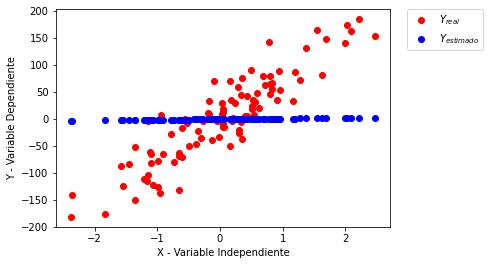

In [2]:
from sklearn import datasets
#import matplotlib.pyplot as plt

# 0) Cargar datos
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=40, random_state=4)

#plt.plot(X_numpy, y_numpy, 'ro')

# cast a Tensor
X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0],1)

# 1) Entrenamiento
model = gradiente_descent(X, y, iters=1)

# 2) Graficar
predicted = model(X).detach().numpy()

plot_fit(X_numpy, y_numpy, predicted)

epoch 0:  loss = 6346.33935547
epoch 2:  loss = 5964.29687500
epoch 4:  loss = 5610.43701172


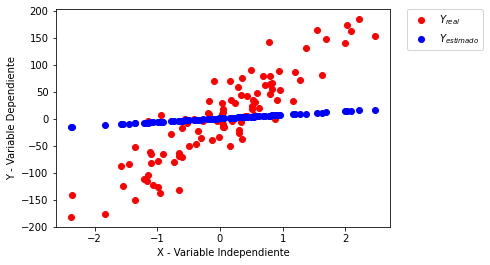

In [3]:
# 1) Entrenamiento
model = gradiente_descent(X, y, iters=5)

# 2) Graficar
predicted = model(X).detach().numpy()

plot_fit(X_numpy, y_numpy, predicted)

epoch 0:  loss = 6352.90869141
epoch 2:  loss = 5969.78955078
epoch 4:  loss = 5614.97802734
epoch 6:  loss = 5286.38085938
epoch 8:  loss = 4982.05615234
epoch 10:  loss = 4700.20898438
epoch 12:  loss = 4439.17822266
epoch 14:  loss = 4197.42333984
epoch 16:  loss = 3973.51879883
epoch 18:  loss = 3766.14404297


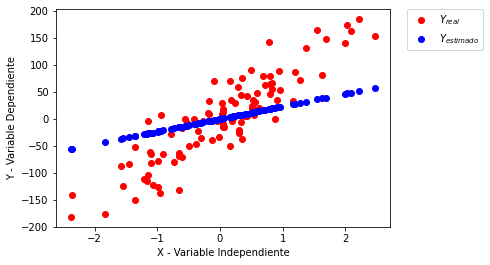

In [4]:
# 1) Entrenamiento
model = gradiente_descent(X, y, iters=20)

# 2) Graficar
predicted = model(X).detach().numpy()

plot_fit(X_numpy, y_numpy, predicted)

epoch 0:  loss = 6197.84667969
epoch 2:  loss = 5826.50195312
epoch 4:  loss = 5482.56689453
epoch 6:  loss = 5164.01904297
epoch 8:  loss = 4868.97949219
epoch 10:  loss = 4595.71289062
epoch 12:  loss = 4342.60986328
epoch 14:  loss = 4108.17822266
epoch 16:  loss = 3891.04248047
epoch 18:  loss = 3689.92260742
epoch 20:  loss = 3503.63500977
epoch 22:  loss = 3331.08666992
epoch 24:  loss = 3171.26147461
epoch 26:  loss = 3023.21972656
epoch 28:  loss = 2886.09179688
epoch 30:  loss = 2759.07275391
epoch 32:  loss = 2641.41625977
epoch 34:  loss = 2532.43041992
epoch 36:  loss = 2431.47583008
epoch 38:  loss = 2337.96020508
epoch 40:  loss = 2251.33398438
epoch 42:  loss = 2171.08984375
epoch 44:  loss = 2096.75634766
epoch 46:  loss = 2027.89782715
epoch 48:  loss = 1964.11047363
epoch 50:  loss = 1905.02062988
epoch 52:  loss = 1850.28125000
epoch 54:  loss = 1799.57238770
epoch 56:  loss = 1752.59619141
epoch 58:  loss = 1709.07800293
epoch 60:  loss = 1668.76293945
epoch 62:  lo

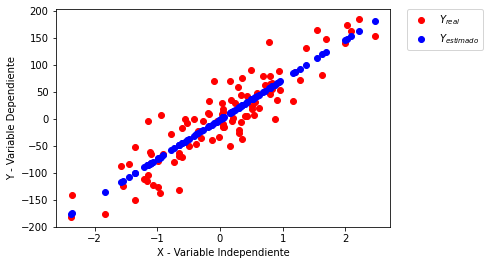

In [5]:
# 1) Entrenamiento
model = gradiente_descent(X, y, iters=300)

# 2) Graficar
predicted = model(X).detach().numpy()

plot_fit(X_numpy, y_numpy, predicted)